In [15]:
%load_ext autoreload
%autoreload 2

from os import pardir, getcwd
from os.path import join, abspath, normpath, basename

rootDirectory = abspath(join(getcwd(), pardir))
dataDirectory = join(rootDirectory, 'data')
modelDirectory = join(rootDirectory, 'models')
currentSensorsh = ('https://raw.githubusercontent.com/fablabbcn/smartcitizen-kit-20/master/lib/Sensors/Sensors.h')

# `do not disturb` mode
import warnings                                  
warnings.filterwarnings('ignore')

## Create a button that hides cells
from IPython.display import HTML, display, clear_output, Markdown
from ipywidgets import interact
import ipywidgets as widgets

from src.data.recording_class import recordings
from src.data.test_utils import getSensorNames
currentSensorNames = getSensorNames(currentSensorsh, join(dataDirectory, 'interim'))

import matplotlib.pyplot as plot
plot.style.use('seaborn')
%matplotlib inline

# Initialise recordings
records = recordings()

print ('Notebook initialisation -> OK')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded updated sensor names and dumped into /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/sensorNames.sav
Notebook initialisation -> OK


## Load Data

In [16]:
from src.data.test_utils import getTests
from src.data.api_utils import getKitID
import re

out_load = widgets.Output()

selectedTest = tuple()
def selectTests(x):
    global selectedTest
    selectedTest = list(x)
    selectedTestBases = list()
    selectedTestBases.append('')
    for test in selectedTest:
        selectedTestBases.append(basename(normpath(test)))
    name_drop_api.options = selectedTestBases
            
def loadButton(b):
    with out_load:
        clear_output()
        
        target_raster_csv = raster_text_csv.value + raster_drop_csv.value
        if na_drop_csv.value != 'None':
            na_drop_action = na_drop_csv.value
            na_dropage = True
        else:
            na_dropage = False
            na_drop_action = ''
        for testCSV in selectedTest:
            testName = basename(normpath(testCSV))
            records.add_recording_CSV(testName, testCSV, currentSensorNames, target_raster_csv, na_dropage, na_drop_action)
        
        
        if kitList_api.value != '':
            target_raster_api = raster_text_api.value + raster_drop_api.value
            devices = kitList_api.value.strip('').split(',')
            devicesCorrected = list()
            
            for device in devices: 
                device = re.sub(' ', '', device)
                devicesCorrected.append(device)
            
            if name_drop_api.value == '':
                testName = testName_api.value
                print (testName)

            else:
                testName = name_drop_api.value
            
            if testName != '':
                if na_drop_api.value != 'None':
                    na_drop_action = na_drop_api.value
                    na_dropage = True
                else:
                    na_dropage = False
                    na_drop_action = ''
                records.add_recording_API(testName, devicesCorrected, currentSensorNames, start_date_widget_api.value, end_date_widget_api.value, \
                                          target_raster_api, dataDirectory)
       
        unload_drop.options = records.readings.keys()
        
def clearButton(b):
    with out_load:
        clear_output()
        records.clear_recordings()
        unload_drop.options = records.readings.keys()
        
def clearAPI(b):
    with out_load:
        clear_output()
        kitList_api.value = ''
        testName_api.value = ''
        
def reload_list(b):
    with out_load:
        clear_output()
        global tests
        tests = getTests(dataDirectory)

def clearSelButton(b):
    with out_load:
        clear_output()
        records.del_recording(unload_drop.value)
        unload_drop.options = records.readings.keys()
        if len(records.readings.keys()) > 0:
            print ('Current recordings list:')
            for reading in records.readings.keys():
                print ('\t',reading)
        else:
            print ('Current recordings list is empty')
        
## API
banner_api = widgets.HTML('<h3>Import API Tests</h3>')
kitList_api = widgets.Text(description = 'Kit List')
testName_api = widgets.Text(description = 'Test Name')

name_drop_api = widgets.Dropdown(options = selectedTest,
                                  description = 'Merge with CSV',
                                  layout = widgets.Layout(width='300px'))

raster_text_api = widgets.Text(description = 'Target Raster',
                              value = '1',
                              layout = widgets.Layout(width='300px'))

raster_drop_api = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

na_drop_api = widgets.Dropdown(options = ['None', 'fill', 'drop'],
                                  value = 'fill',
                                  description = 'Process na',
                                  layout = widgets.Layout(width='200px'))

clearAPIB = widgets.Button(description = 'Clear')
clearAPIB.on_click(clearAPI)

start_date_widget_api = widgets.DatePicker(description='Start Date')
end_date_widget_api = widgets.DatePicker(description='End Date')
dateBox_api = widgets.VBox([start_date_widget_api, end_date_widget_api, clearAPIB])

raster_box_api = widgets.HBox([raster_text_api, raster_drop_api, na_drop_api])
namebox_api = widgets.HBox([testName_api, name_drop_api])
Hbox_api = widgets.VBox([kitList_api, namebox_api])
apiBox = widgets.VBox([banner_api, Hbox_api, raster_box_api, dateBox_api])
        
## CSV
reload_list_button = widgets.Button(description='Reload List')
reload_list_button.on_click(reload_list)

display(widgets.HTML('<h2>Test load</h2>'))
display(widgets.HBox([widgets.HTML('<h3>Import CSV Tests</h3>')]),#, reload_list_button]),
       layout = widgets.Layout(justify='space-between'))

tests = getTests(dataDirectory)

interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTest, 
                           layout=widgets.Layout(width='600px')))

raster_text_csv = widgets.Text(description = 'Target Raster',
                              value = '1',
                              layout = widgets.Layout(width='300px'))

raster_drop_csv = widgets.Dropdown(options = ['H', 'Min', 'S', 'ms'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

na_drop_csv = widgets.Dropdown(options = ['None', 'fill', 'drop'],
                                  value = 'fill',
                                  description = 'Process na',
                                  layout = widgets.Layout(width='200px'))

raster_box_csv = widgets.HBox([raster_text_csv, raster_drop_csv, na_drop_csv])

# buttonBox_csv = widgets.HBox([loadB_csv, resetB_csv])
csvBox = widgets.VBox([raster_box_csv])#, buttonBox_csv])

loadB = widgets.Button(description='Load')
loadB.on_click(loadButton)

resetB = widgets.Button(description='Clear All')
resetB.on_click(clearButton)

unload_drop = widgets.Dropdown(options = records.readings.keys(),
                                  layout = widgets.Layout(width='200px'))

resetOneB = widgets.Button(description='Clear Selected')
resetOneB.on_click(clearSelButton)

buttonBox = widgets.HBox([loadB, resetB, unload_drop, resetOneB])
# Display everything
display(csvBox)
display(apiBox)
display(widgets.HTML('<hr>'))
display(buttonBox)
display(out_load)

HTML(value='<h2>Test load</h2>')

interactive(children=(SelectMultiple(description='x', layout=Layout(width='600px'), options={'2017-06_INT_FIRM…

HTML(value='<hr>')

Output()

,HUM,EXT_PN_5,EXT_PM_A_1,EXT_PM_A_25,EXT_PM_A_10,EXT_PN_A_03,EXT_PN_A_05,EXT_PN_A_1,EXT_PN_A_25,EXT_PN_A_5,EXT_PN_A_10,EXT_PM_B_1,EXT_PM_B_25,EXT_PM_B_10,EXT_PN_B_03,EXT_PN_B_05,EXT_PN_B_1,EXT_PN_B_25,EXT_PN_B_5,EXT_PN_B_10
TIME,,,,,,,,,,,,,,,,,,,,
2019-01-28 16:24:00+01:00,26.330,985.0,22.0,25.0,25.0,21.0,25.0,25.0,4257.0,1098.0,79.0,17.0,23.0,24.0,17.0,23.0,24.0,3129.0,872.0,88.0
2019-01-28 16:25:00+01:00,26.695,902.0,22.5,26.5,27.0,22.0,26.5,27.0,3832.5,1033.0,102.0,17.0,23.0,24.0,17.0,23.0,24.0,2824.5,771.5,111.5
2019-01-28 16:26:00+01:00,26.690,1022.0,23.0,27.0,27.0,22.0,27.0,27.0,4107.0,1086.0,89.0,22.0,26.0,26.0,22.0,26.0,26.0,3567.0,958.0,84.0
2019-01-28 16:27:00+01:00,27.030,577.0,25.0,29.0,29.0,24.0,29.0,29.0,4335.0,1155.0,89.0,20.0,26.0,26.0,20.0,26.0,26.0,0.0,0.0,0.0


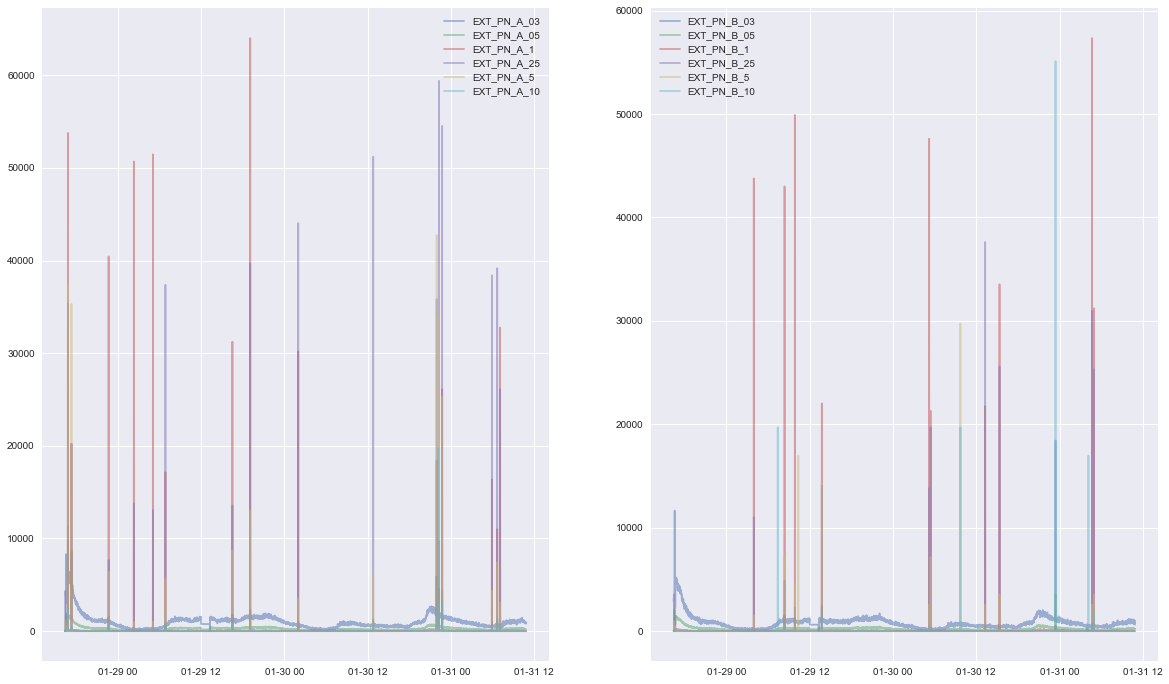

In [17]:
import re
import numpy as np
import matplotlib.pyplot as plot
from matplotlib import gridspec
import pandas as pd

dict_trials = dict()
PRE = 'EXT_PN'
SENSOR = ['A', 'B']
DENSITY = 1.65 # g/cm3

# dataframe = records.readings['2019-01_INT_PM_PN_ANALYSIS']['devices']['STATION']['data'].copy()
dataframe = records.readings['2019-01_INT_PM_PN_ANALYSIS_LONG_TERM']['devices']['STATION']['data'].copy()

dataframe.drop(['BATT', 'TEMP', 'PM_DALLAS_TEMP', 'PRESS', 'LIGHT', 'NOISE_A', 'PM_1', 'PM_25',
       'PM_10', 'PN_03', 'PN_05', 'PN_1',
       'PN_25', 'PN_5', 'PN_10', 'GB_1A', 'GB_1W', 'GB_2A', 'GB_2W', 'GB_3A',
       'GB_3W', 'GB_TEMP', 'GB_HUM', 'EXT_PM_1', 'EXT_PM_25', 'EXT_PM_10','EXT_PN_03', 'EXT_PN_05', 'EXT_PN_1', 'EXT_PN_25', 'EXT_PN_10',
        'EXT_PM_10'], axis=1, inplace=True)

display(dataframe.head(4))

gs = gridspec.GridSpec(1, 2)
fig = plot.figure(figsize=(20,12))
fig.tight_layout()

ax = fig.add_subplot(gs[0])
plot.plot(dataframe.index, (dataframe['EXT_PN_A_03']), label = 'EXT_PN_A_03', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_A_05']), label = 'EXT_PN_A_05',  alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_A_1']), label = 'EXT_PN_A_1', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_A_25']), label = 'EXT_PN_A_25', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_A_5']), label = 'EXT_PN_A_5', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_A_10']), label = 'EXT_PN_A_10', alpha = 0.5)
plot.legend(loc = 'best')

ax = fig.add_subplot(gs[1])
plot.plot(dataframe.index, (dataframe['EXT_PN_B_03']), label = 'EXT_PN_B_03', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_B_05']), label = 'EXT_PN_B_05',  alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_B_1']), label = 'EXT_PN_B_1', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_B_25']), label = 'EXT_PN_B_25', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_B_5']), label = 'EXT_PN_B_5', alpha = 0.5)
plot.plot(dataframe.index, (dataframe['EXT_PN_B_10']), label = 'EXT_PN_B_10', alpha = 0.5)
plot.legend(loc = 'best')

## Clean Data

Calculating: HUM. Pass#: 0
Scale factor: 0.9
	Calculating... HUM


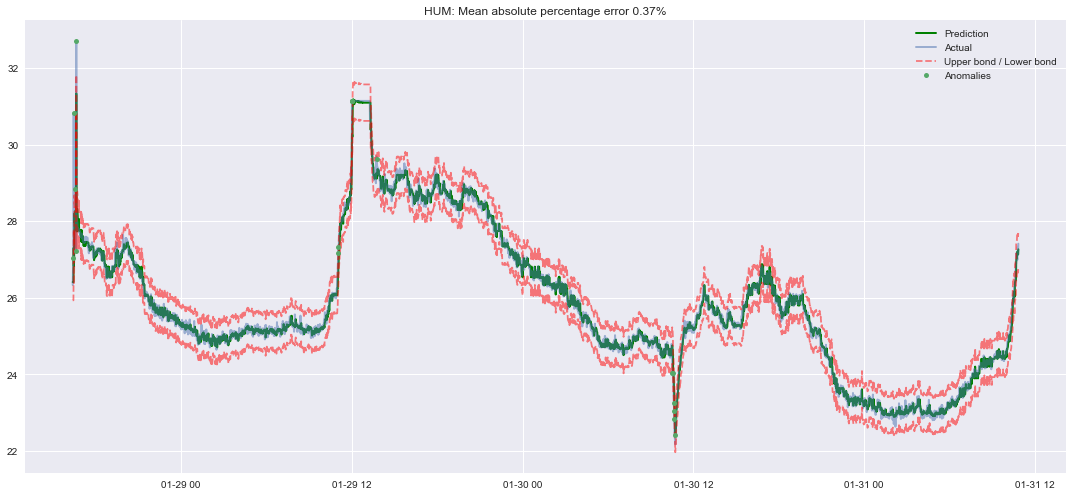

Cleaning: HUM. Pass#: 0. Method:before-after-avg
Calculating: HUM. Pass#: 1
Scale factor: 0.8181818181818181
	Calculating... HUM


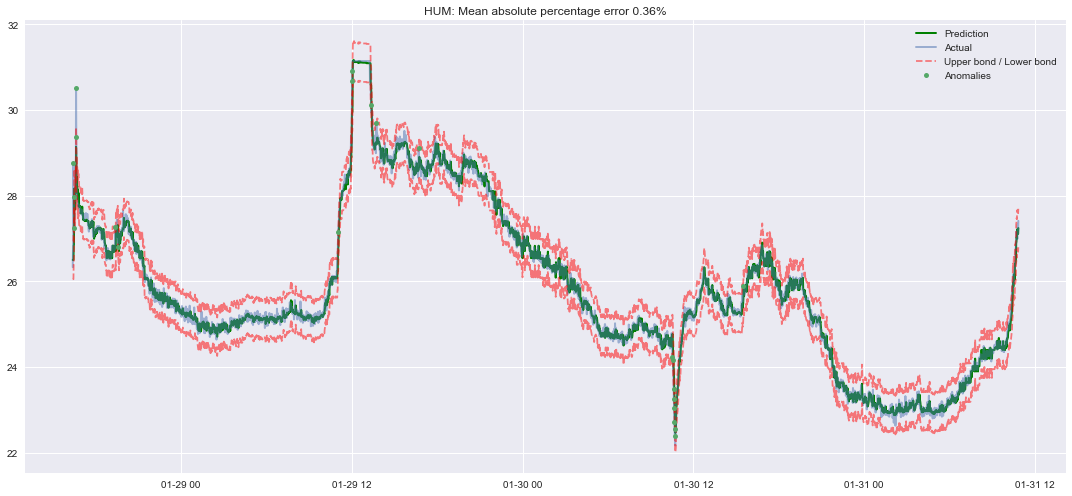

Cleaning: HUM. Pass#: 1. Method:before-after-avg
Calculating: HUM. Pass#: 2
Scale factor: 0.7438016528925618
	Calculating... HUM


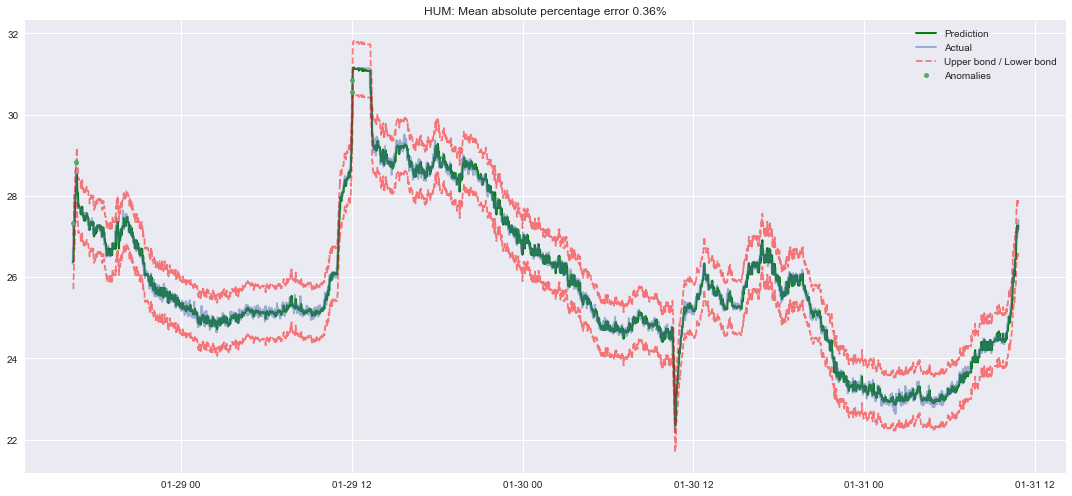

Cleaning: HUM. Pass#: 2. Method:before-after-avg
Calculating: HUM. Pass#: 3
Scale factor: 0.6761833208114197
	Calculating... HUM


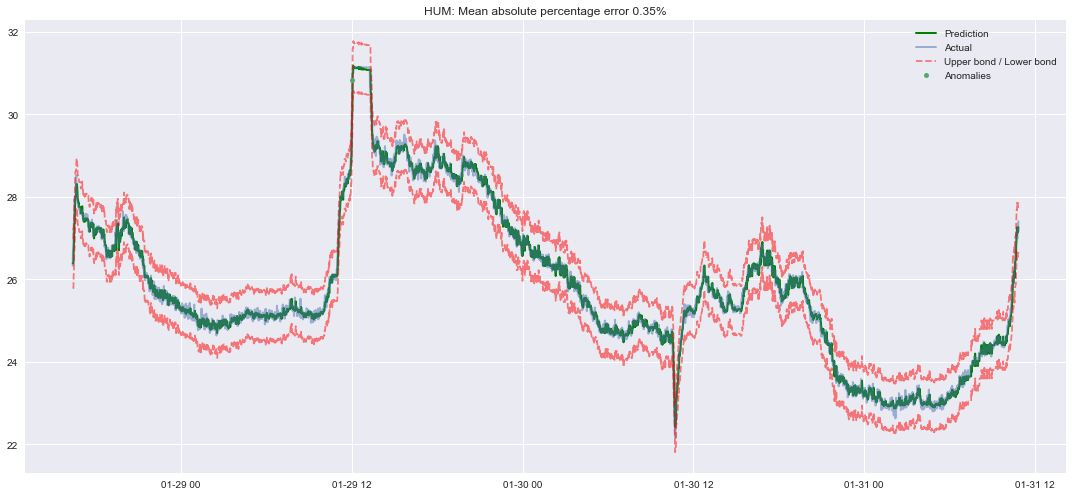

Cleaning: HUM. Pass#: 3. Method:before-after-avg
Calculating: HUM. Pass#: 4
Scale factor: 0.6147121098285635
	Calculating... HUM


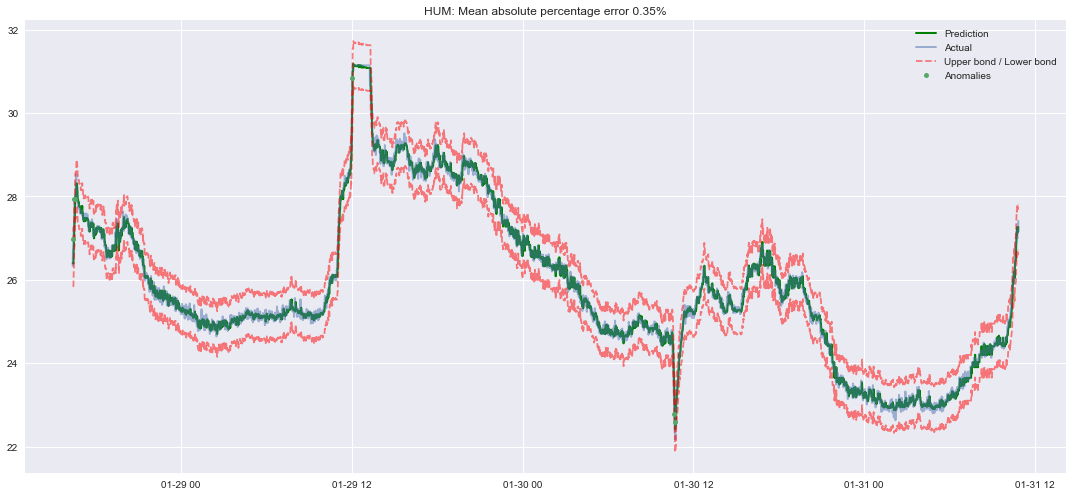

Cleaning: HUM. Pass#: 4. Method:before-after-avg


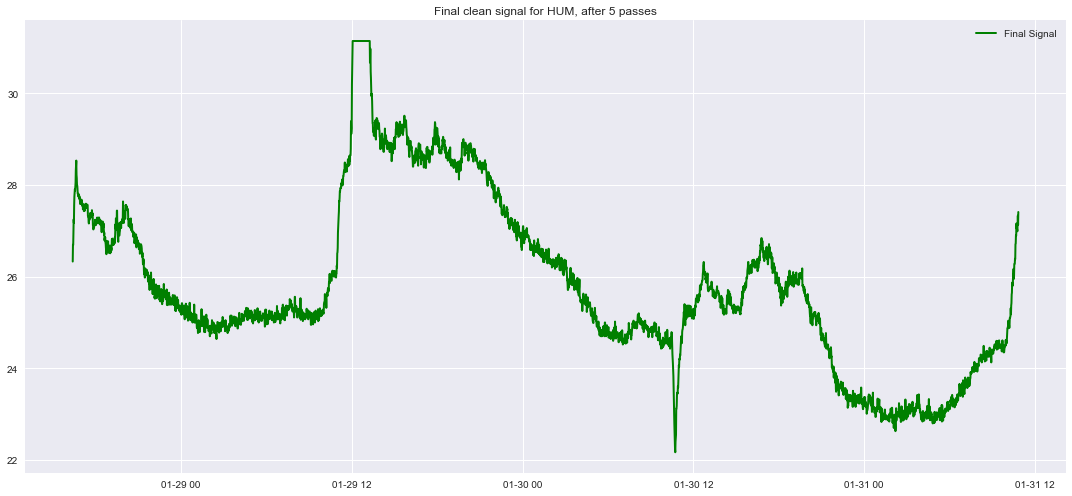

-------
Calculating: EXT_PN_5. Pass#: 0
Scale factor: 0.9
	Calculating... EXT_PN_5


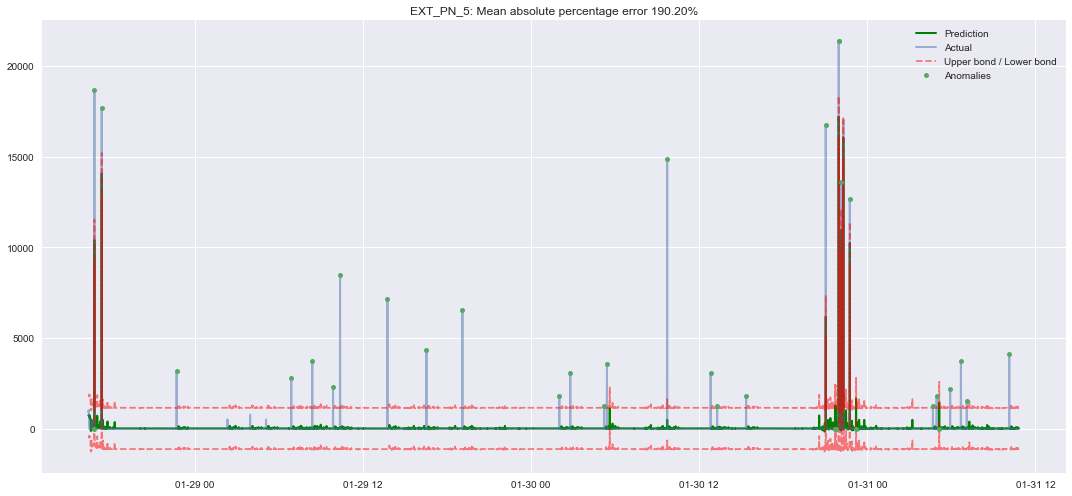

Cleaning: EXT_PN_5. Pass#: 0. Method:before-after-avg
Calculating: EXT_PN_5. Pass#: 1
Scale factor: 0.8181818181818181
	Calculating... EXT_PN_5


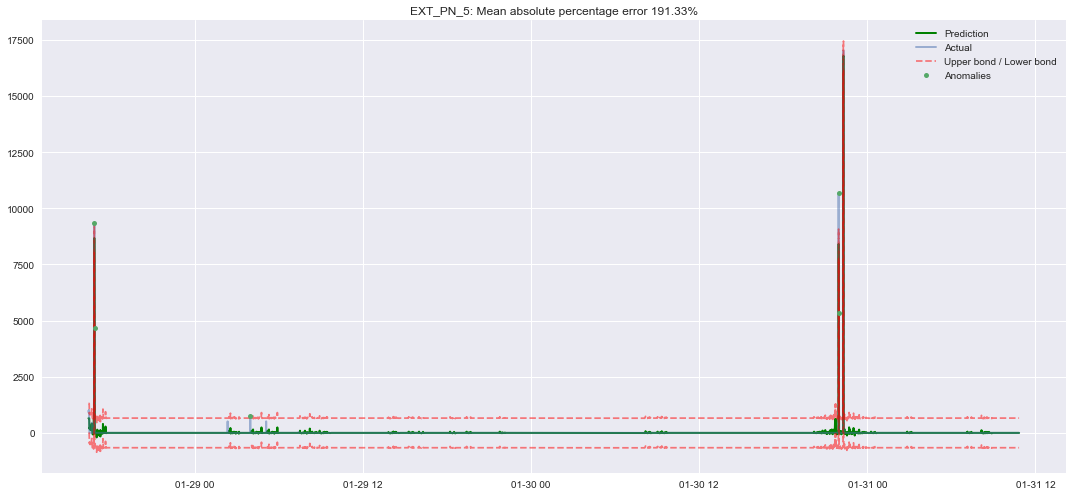

Cleaning: EXT_PN_5. Pass#: 1. Method:before-after-avg
Calculating: EXT_PN_5. Pass#: 2
Scale factor: 0.7438016528925618
	Calculating... EXT_PN_5


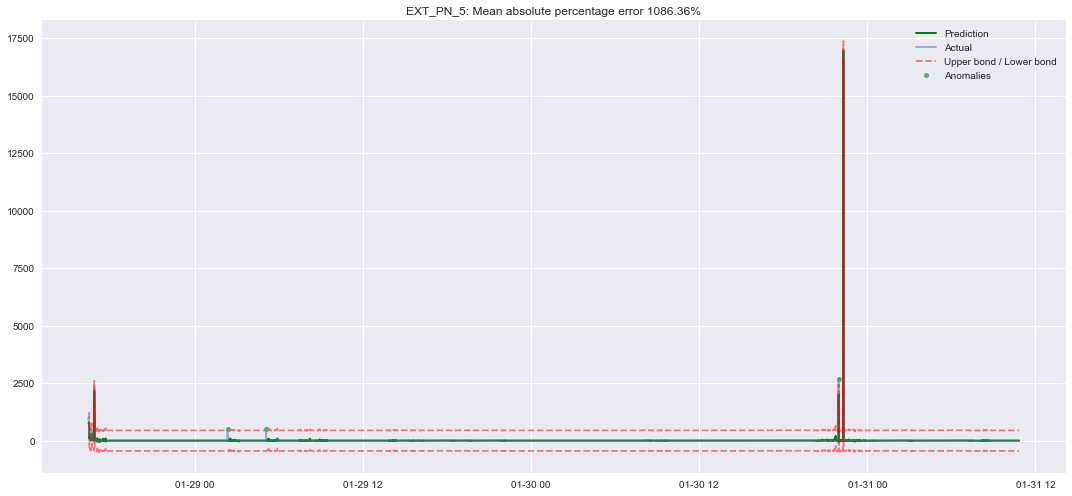

Cleaning: EXT_PN_5. Pass#: 2. Method:before-after-avg
Calculating: EXT_PN_5. Pass#: 3
Scale factor: 0.6761833208114197
	Calculating... EXT_PN_5


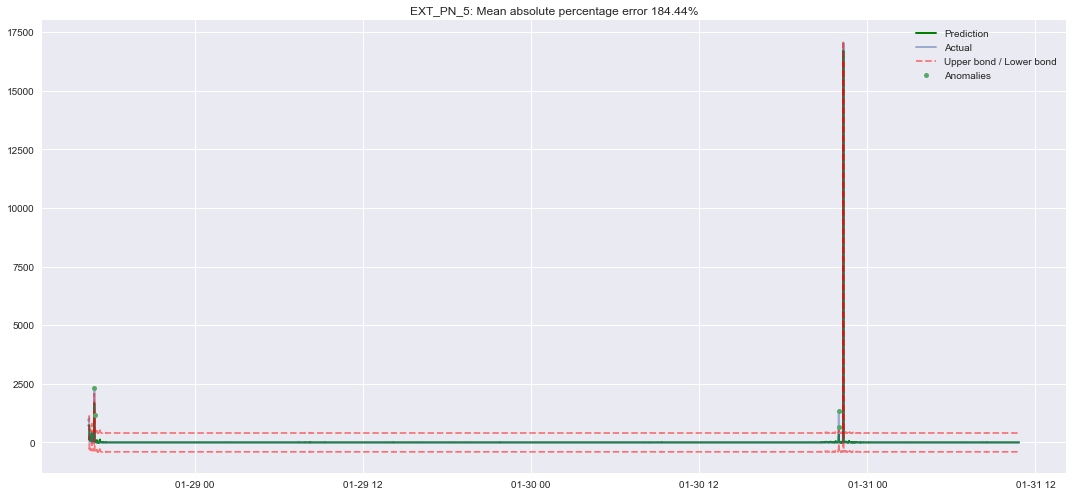

Cleaning: EXT_PN_5. Pass#: 3. Method:before-after-avg
Calculating: EXT_PN_5. Pass#: 4
Scale factor: 0.6147121098285635
	Calculating... EXT_PN_5


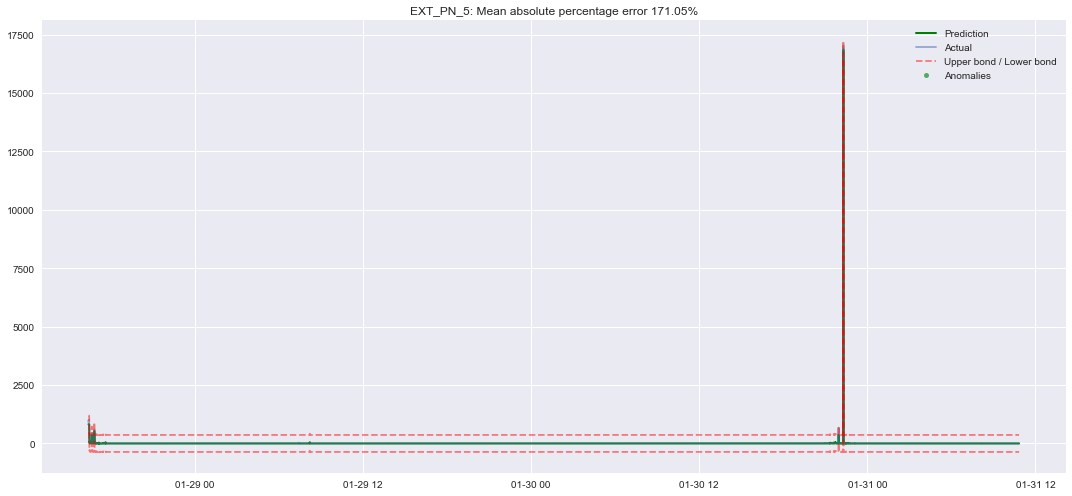

Cleaning: EXT_PN_5. Pass#: 4. Method:before-after-avg


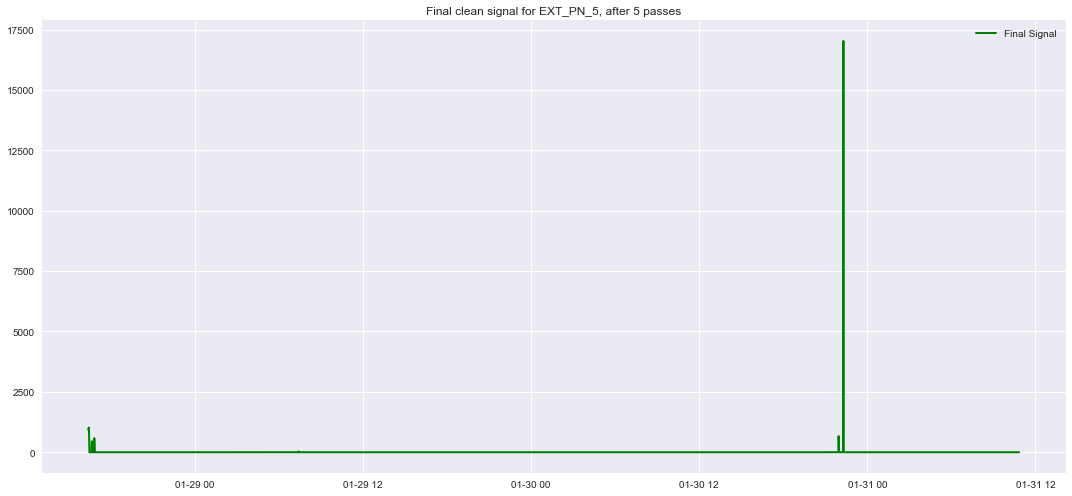

-------
Calculating: EXT_PM_A_1. Pass#: 0
Scale factor: 0.9
	Calculating... EXT_PM_A_1


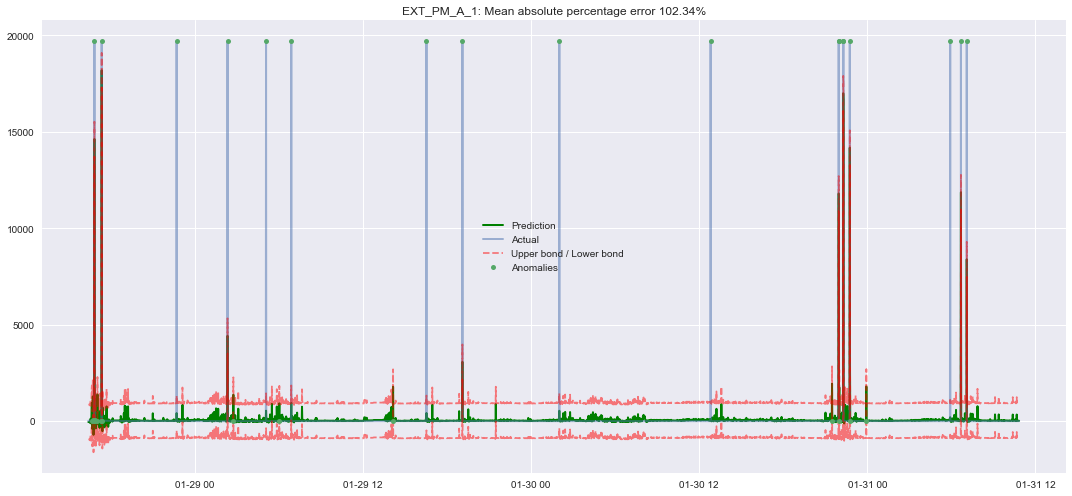

Cleaning: EXT_PM_A_1. Pass#: 0. Method:before-after-avg
Calculating: EXT_PM_A_1. Pass#: 1
Scale factor: 0.8181818181818181
	Calculating... EXT_PM_A_1


In [ ]:
%matplotlib inline

from src.data.signal_utils import mean_absolute_percentage_error, timeseries_train_test_split, \
                         plotModelResults, prepareDataFrame

data_pm_pn = dataframe.copy()

## Ignore columns
irrelevantColumns = []
frequency = '1Min'

# Resample data
dataframe_clean = prepareDataFrame(data_pm_pn, 
                _frequencyResample = frequency, 
                _irrelevantColumns = irrelevantColumns, 
                _numberPasses = 5, _plotModelAnom = True, 
                _scaleAnom = 0.9, _narrowDownFactor = 1.1, _methodAnom = 'before-after-avg', 
                _append_clean = '')

KeyError: 'EXT_PN_A_03'

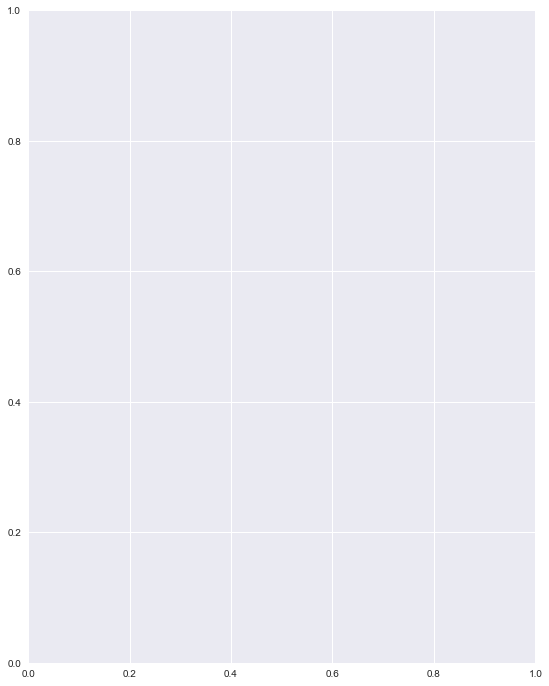

In [60]:
gs = gridspec.GridSpec(1, 2)
fig = plot.figure(figsize=(20,12))
fig.tight_layout()

ax = fig.add_subplot(gs[0])
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_A_03']), label = 'EXT_PN_A_03', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_A_05']), label = 'EXT_PN_A_05',  alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_A_1']), label = 'EXT_PN_A_1', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_A_25']), label = 'EXT_PN_A_25', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_A_5']), label = 'EXT_PN_A_5', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_A_10']), label = 'EXT_PN_A_10', alpha = 0.5)
plot.legend(loc = 'best')

ax = fig.add_subplot(gs[1])
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_B_03']), label = 'EXT_PN_B_03', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_B_05']), label = 'EXT_PN_B_05',  alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_B_1']), label = 'EXT_PN_B_1', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_B_25']), label = 'EXT_PN_B_25', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_B_5']), label = 'EXT_PN_B_5', alpha = 0.5)
plot.plot(dataframe_clean.index, np.log10(dataframe_clean['EXT_PN_B_10']), label = 'EXT_PN_B_10', alpha = 0.5)
plot.legend(loc = 'best')

## Define Constants and Model Parameters

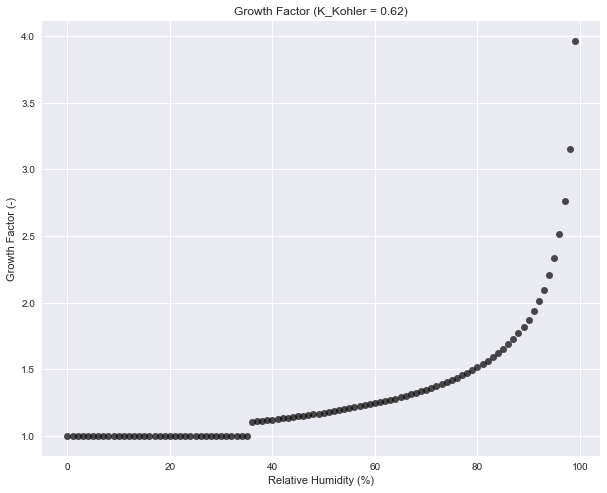

In [91]:
from src.models.formula_utils import maxer_hist, miner, maxer

# CONSTANTS
DENSITY = 1.65
K_KOHLER = 0.62 # MIXPO
MIN_EFFLO_RH = 35

## Plot Correction
df = pd.DataFrame()
df['humidity_example'] = np.arange(0,100,1)

def grow_factor_calc (row):
    return np.power(1 + K_KOHLER * row/(100-row), 1.0/3)

def calculate_fraction(bins):

    fraction = np.zeros([bins.shape[0], bins.shape[1], HARD_LOWER_LIMITS.shape[0]])
    
    # Change this to numpy broadcasting
    for k in range(fraction.shape[0]):
        for i in range(fraction.shape[1]-1):
            for j in range(fraction.shape[2]):
                if (bins[k, i]>=HARD_UPPER_LIMITS[j]):
                    fraction[k, i, j] = 0
                elif bins[k, i+1]<=HARD_UPPER_LIMITS[j]:
                    fraction[k, i, j] = 1
                else:
                    fraction[k, i, j] = (HARD_UPPER_LIMITS[j]-bins[k, i])/(bins[k, i+1]-bins[k, i])
                
                # print (bins[k, i], bins[k, i+1], HARD_LOWER_LIMITS[j], HARD_UPPER_LIMITS[j], fraction[k, i, j])
            
    return fraction

df['growth_factor_example'] = df.apply(lambda row: grow_factor_calc(row['humidity_example']) if (row['humidity_example'] > MIN_EFFLO_RH) else 1, axis = 1)

fig = plot.figure(figsize=(10,8))
plot.plot(df.humidity_example, df.growth_factor_example, 'ko', alpha = 0.7)
plot.xlabel('Relative Humidity (%)')
plot.ylabel('Growth Factor (-)')
plot.title('Growth Factor (K_Kohler = {})'.format(K_KOHLER))
plot.grid(True)
plot.show()

In [82]:
data_modify = dataframe_clean.copy()

HARD_LOWER_LIMITS = np.array([0, 1, 2.5])
HARD_UPPER_LIMITS = np.array([1, 2.5, 10])

# BINS ARE BETWEEN VALUE and VALUE + 1
BINS_NAME = ["03", "05", "1", "25", "5", "10"]
BINS = np.array([0.3, 0.5, 1.0, 2.5, 5.0, 10.0]) #um
BINS = BINS.reshape(1, BINS.shape[0])
BINS_RAW = BINS*np.ones([data_modify.shape[0],1])

# Calculate Raw fraction
fraction_raw = calculate_fraction(BINS_RAW)

BINS_DI = BINS.copy()
HARD_LOWER_LIMITS = np.array([0.0, 1.0, 2.5])
HARD_UPPER_LIMITS = np.array([1.0, 2.5, 10.0])

## Not clear whether Di should be between bins or not
for i in range(BINS.shape[1]-1):
    BINS_DI[0, i] = BINS[0, i] * np.power(1.0/4*(1+np.power(BINS[0,i+1]/BINS[0,i],2))*(1+BINS[0,i+1]/BINS[0,i]),1.0/3)
MASS_DI = np.pi/6.0 * np.power(BINS_DI, 3) * DENSITY * 1.0/1e6 #ug
MASS_DI [0,0] = 1*MASS_DI [0,0]
MASS_DI [0,1] = 1*MASS_DI [0,1]

print('---RAW VALUES---')
print('BINS_NAME', BINS_NAME)
print('BINS', BINS)
print('BINS_DI', BINS_DI)
print('MASS_DI', MASS_DI)

# Just for the shake of testing
data_modify['HUM'] = data_modify['HUM']*2
data_modify['growth_factor'] = data_modify.apply(lambda row: grow_factor_calc(row['HUM']) if (row['HUM'] > MIN_EFFLO_RH) else 1, axis = 1)

# Calculate new particle diameter bins
bins_cor = (BINS.T / data_modify['growth_factor'][:,None].T).T
bins_di_cor = (BINS_DI.T / data_modify['growth_factor'][:,None].T).T
fraction_cor = calculate_fraction(bins_cor) # fraction is a 3D matrix with rows = time, columns = bins, z = PM1, PM2.5, PM10.0 fractions

# Calculate mass based on that new diamater
mass_di_cor = np.round(np.pi/6.0 * np.power(bins_di_cor, 3) * DENSITY, 5) * 1.0/1e6 #ug

print('\n---COR VALUES---')
print('BINS_NAME', BINS_NAME)
print('bins_cor', bins_cor[:2])
print('bins_di_cor', bins_di_cor[:2])
print('mass_di_cor', mass_di_cor[:2])

MIN_THD_COUNT = 5 # Discard PN bins below this thd

---RAW VALUES---
BINS_NAME ['03', '05', '1', '25', '5', '10']
BINS [[ 0.3  0.5  1.   2.5  5.  10. ]]
BINS_DI [[ 0.40816551  0.77680813  1.85118016  3.88404063  7.76808126 10.        ]]
MASS_DI [[5.87477826e-08 4.04970928e-07 5.48060656e-06 5.06213660e-05
  4.04970928e-04 8.63937980e-04]]

---COR VALUES---
BINS_NAME ['03', '05', '1', '25', '5', '10']
bins_cor [[0.25187606 0.41979343 0.83958686 2.09896715 4.1979343  8.39586861]
 [0.25086501 0.41810834 0.83621669 2.09054171 4.18108343 8.36216685]]
bins_di_cor [[0.3426904  0.6521979  1.55422654 3.26098948 6.52197896 8.39586861]
 [0.34131481 0.64957992 1.54798774 3.24789958 6.49579917 8.36216685]]
mass_di_cor [[3.4770000e-08 2.3967000e-07 3.2435900e-06 2.9959240e-05 2.3967390e-04
  5.1130433e-04]
 [3.4350000e-08 2.3680000e-07 3.2046800e-06 2.9599910e-05 2.3679926e-04
  5.0517175e-04]]


## Calculate and plot result

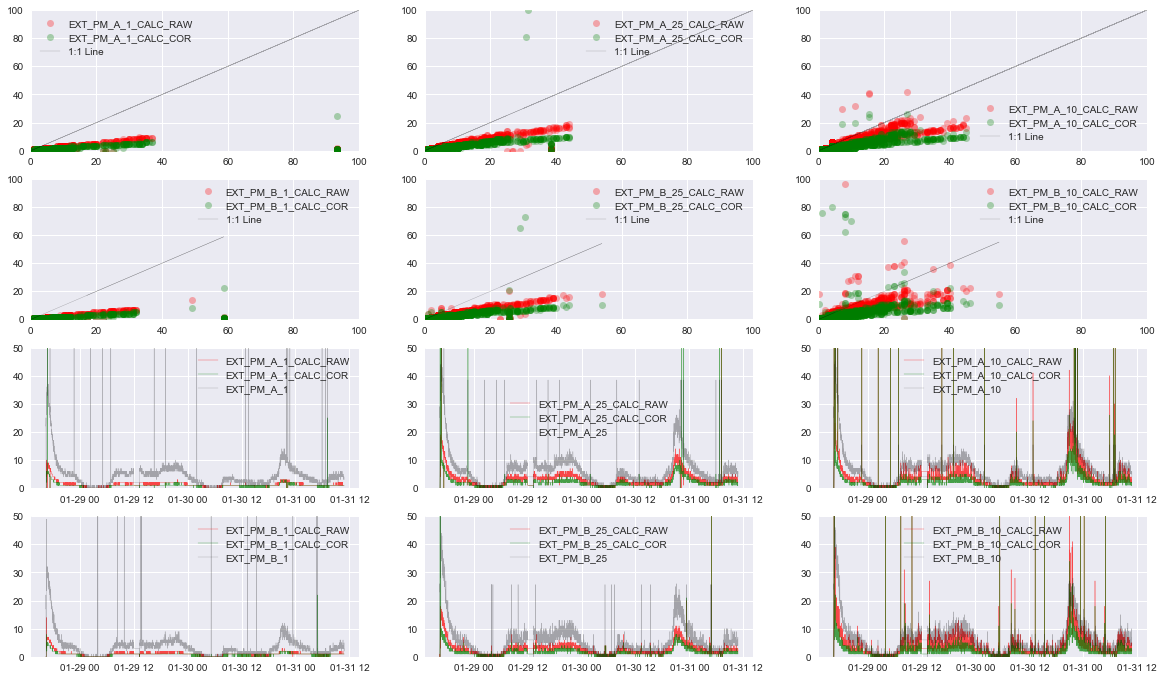

In [86]:
i = 0

gs = gridspec.GridSpec(5, 3)
fig = plot.figure(figsize=(20,15))

fig.tight_layout()

for sensor in SENSOR:
    
    data_modify[PRE + '_' + sensor + '_03_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_03'] - data_modify[PRE + '_' + sensor + '_05'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_05_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_05'] - data_modify[PRE + '_' + sensor + '_1'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_1_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_1'] - data_modify[PRE + '_' + sensor + '_25'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_25_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_25'] - data_modify[PRE + '_' + sensor + '_5'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_5_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_5'] - data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_10_ABS'] = 0 # maxer_hist(data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)
    
    mask = data_modify.columns.str.contains(PRE + '_' + sensor + '_.*_ABS')
    
    pn_abs_values = data_modify.loc[:,mask].values
    pm_abs_values_raw = MASS_DI * pn_abs_values * 1e4
    pm_abs_values_cor = np.multiply(mass_di_cor, pn_abs_values) * 1e4 #element wise
    
    for PM_BIN in HARD_UPPER_LIMITS:
        if PM_BIN == 1.0:
            fraction_index = 0
            PM_BIN_NAME = '1'
        elif PM_BIN == 2.5:
            fraction_index = 1
            PM_BIN_NAME = '25'
        elif PM_BIN == 10.0:
            fraction_index = 2
            PM_BIN_NAME = '10'
                    
        pm_fraction_values_raw = np.zeros([pm_abs_values_raw.shape[0],1])
        pm_fraction_values_cor = np.zeros([pm_abs_values_cor.shape[0],1])

        for row in range(pm_fraction_values_raw.shape[0]):
            pm_fraction_values_raw[row] = np.round(np.dot(pm_abs_values_raw[row,:], fraction_raw[row,:, fraction_index]))
            pm_fraction_values_cor[row] = np.round(np.dot(pm_abs_values_cor[row,:], fraction_cor[row,:, fraction_index]))

        data_modify['EXT_PM' + '_' + sensor + '_' + PM_BIN_NAME + '_CALC_RAW'] = pm_fraction_values_raw
        data_modify['EXT_PM' + '_' + sensor + '_' + PM_BIN_NAME + '_CALC_COR'] = pm_fraction_values_cor
        
        ax = fig.add_subplot(gs[i])
        
        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
                  'ro', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW', alpha = 0.3)
        
        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR'], 
                  'go', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR', alpha = 0.3)

        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  'k', label = '1:1 Line', linewidth = 0.4, alpha = 0.3)
        plot.legend(loc = 'best')
        plot.xlim([0, 100])
        plot.ylim([0, 100])
        ax = fig.add_subplot(gs[i+6])
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
                  'r', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW', linewidth = 0.4, alpha = 0.7)
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR'], 
                  'g', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR', linewidth = 0.4, alpha = 0.7)
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  'k', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME, linewidth = 0.4, alpha = 0.3)
        
        # plot.plot(data_modify.index, 
        #           data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME]/data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
        #           'b', label = 'ERROR_'+sensor+'_' + PM_BIN_NAME, linewidth = 0.4, alpha = 0.8)
        
        plot.legend(loc = 'best')
        
        plot.ylim([0, 50])
    
        i = i + 1

In [111]:
from src.models.linear_regression_utils import prep_data_OLS, fit_model_OLS, predict_OLS, plot_OLS_coeffs
from src.models.linear_regression_utils import tfuller_plot
from statsmodels.tsa.stattools import grangercausalitytests

test_model = '2019-01_INT_PM_PN_ANALYSIS_LONG_TERM'
tuple_features = (['REF', 'EXT_PM_A_1', 'STATION'],
                 ['A', 'EXT_PN_A_03_ABS', 'STATION'],
                 ['B', 'EXT_PN_A_05_ABS', 'STATION'])

data_model = records.readings[test_model]['devices']['STATION']['data']
SENSOR = ['A', 'B']

for sensor in SENSOR:
    
    data_model[PRE + '_' + sensor + '_03_ABS'] = MASS_DI[0,0] * 1e4 * maxer_hist(data_model[PRE + '_' + sensor + '_03'] - data_model[PRE + '_' + sensor + '_05'], MIN_THD_COUNT, 0)
    data_model[PRE + '_' + sensor + '_05_ABS'] = MASS_DI[0,1] * 1e4 * maxer_hist(data_model[PRE + '_' + sensor + '_05'] - data_model[PRE + '_' + sensor + '_1'], MIN_THD_COUNT, 0)
    data_model[PRE + '_' + sensor + '_1_ABS'] = MASS_DI[0,2] * 1e4 * maxer_hist(data_model[PRE + '_' + sensor + '_1'] - data_model[PRE + '_' + sensor + '_25'], MIN_THD_COUNT, 0)
    data_model[PRE + '_' + sensor + '_25_ABS'] = MASS_DI[0,3] * 1e4 * maxer_hist(data_model[PRE + '_' + sensor + '_25'] - data_model[PRE + '_' + sensor + '_5'], MIN_THD_COUNT, 0)
    data_model[PRE + '_' + sensor + '_5_ABS'] = MASS_DI[0,4] * 1e4 * maxer_hist(data_model[PRE + '_' + sensor + '_5'] - data_model[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)
    data_model[PRE + '_' + sensor + '_10_ABS'] = MASS_DI[0,5] * 1e4 * 0 # maxer_hist(data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)

min_date = '2019-01-29 22:31:00'
max_date = '2019-01-30 02:00:00'

model_name = 'PM_PN_REL'
model_target = 'PM' # ALPHASENSE, PMS, MICS...
model_type = 'OLS'

ratio_train = 1./4 # Important that this is a float, don't forget the .
model_full_name = '_'.join([model_target, model_type, model_name])
print ('Model Name', model_full_name)
# formula_expression = 'REF ~ A + B + A*B'
formula_expression = None

print ('Preparing devices from test {}'.format(test_model))
records.prepare_dataframe_model(tuple_features, test_model, min_date, max_date, 
                                      model_full_name, clean_na = True, clean_na_method = 'fill-avg' , 
                                      target_raster = '1Min')

dataframeModel = records.readings[test_model]['models'][model_full_name]['data']
reference_name = records.readings[test_model]['models'][model_full_name]['reference']

labels = dataframeModel[reference_name]
features = dataframeModel.drop(reference_name, axis = 1)

# List of features for later use
feature_list = list(features.columns)
n_features = len(tuple_features)-1

## Prepare Dataframe
dataTrain, dataTest, n_train_periods = prep_data_OLS(dataframeModel, 
                                                     tuple_features, 
                                                     ratio_train)
print (dataTrain.head())
print (dataTest.head())

## Model Fit
model = fit_model_OLS(formula_expression, dataTrain, 
                      fit_intercept = False, 
                      printSummary = True)

try:
    plot_OLS_coeffs(model)
except:
    pass

Model Name PM_OLS_PM_PN_REL
Preparing devices from test 2019-01_INT_PM_PN_ANALYSIS_LONG_TERM

	Data combined successfully
Creating models dict
	Dataframe model generated successfully
                           REF         A         B
TIME                                              
2019-01-29 22:32:00+01:00  8.0  0.637413  1.449796
2019-01-29 22:33:00+01:00  8.0  0.637413  1.449796
2019-01-29 22:34:00+01:00  7.0  0.667962  1.372851
2019-01-29 22:35:00+01:00  6.0  0.536955  1.186565
2019-01-29 22:36:00+01:00  6.0  0.564566  1.340454
                           REF         A         B
TIME                                              
2019-01-29 23:24:00+01:00  5.0  0.491719  1.052924
2019-01-29 23:25:00+01:00  4.0  0.466457  0.992179
2019-01-29 23:26:00+01:00  4.0  0.462345  0.955731
2019-01-29 23:27:00+01:00  6.0  0.511106  1.218962
2019-01-29 23:28:00+01:00  5.0  0.548704  1.061024
                            OLS Regression Results                            
Dep. Variable:          

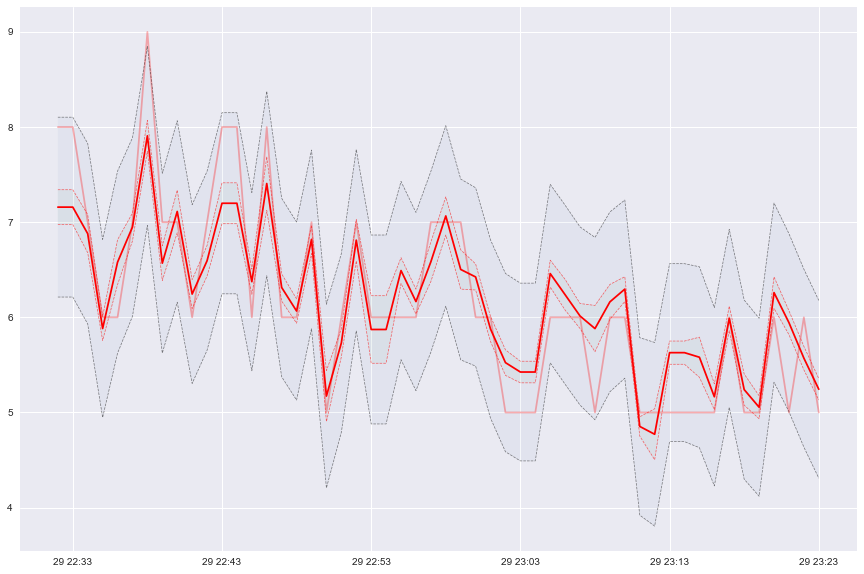

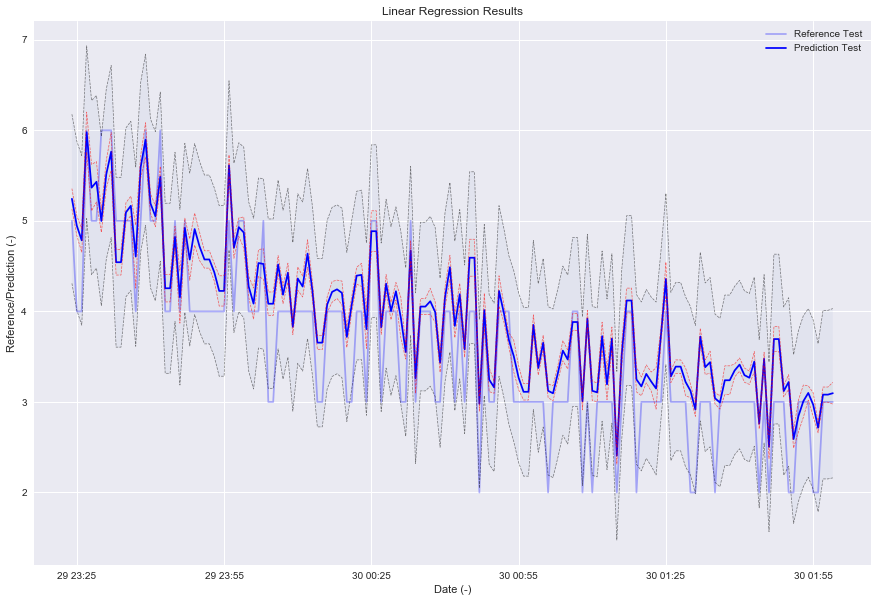

Model archived correctly
Metrics Summary:
Metric                  Train   Test 
avg_ref             	6.154	3.596
avg_est             	6.180	3.954
sig_ref             	1.007	0.953
sig_est             	0.702	0.762
bias                	0.026	0.358
normalised_bias     	0.026	0.376
sigma_norm          	0.697	0.800
sign_sigma          	-1.000	-1.000
rsquared            	0.798	0.689
RMSD                	0.453	0.532
RMSD_norm_unb       	0.491	0.559


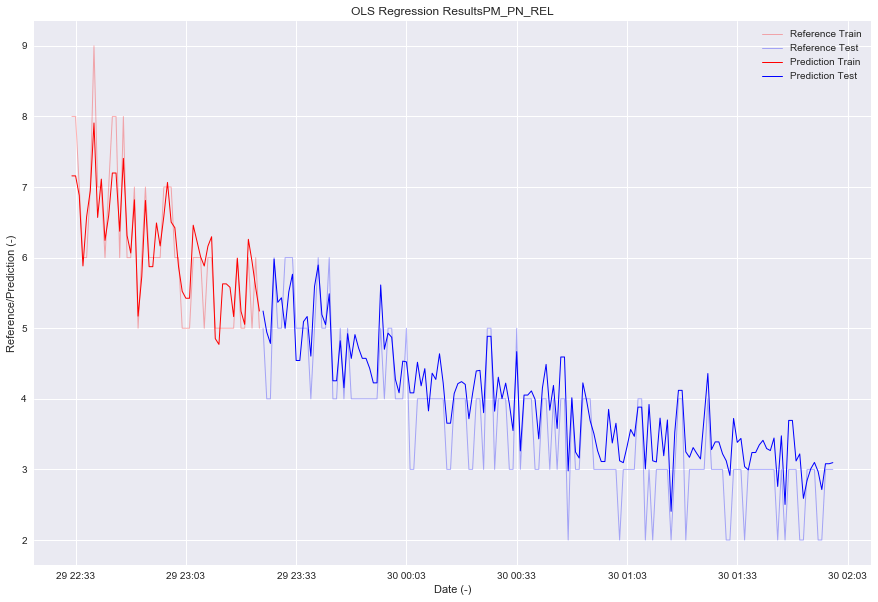

Could not plot feature importances. If model is sequential(), this is not possible


In [112]:
from src.models.linear_regression_utils import predict_OLS
from src.data.signal_utils import metrics
import pandas as pd

## Predict the model results
dataFrameTrain = predict_OLS(model, dataTrain, True, False, 'train')
dataFrameTest = predict_OLS(model, dataTest, True, False, 'test')

## Combine them for export
dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

# Get Metrics
metrics_model = dict()
metrics_model['train'] = metrics(dataFrameTrain['reference'], dataFrameTrain['prediction'])
metrics_model['test'] = metrics(dataFrameTest['reference'], dataFrameTest['prediction'])

records.archive_model(test_model, model_full_name, 
                      metrics_model, 
                      dataFrameExport, model, model_type, 
                      model_target, ratio_train, None)

print ('Metrics Summary:')
print ("{:<23} {:<7} {:<5}".format('Metric','Train','Test'))
for metric in metrics_model['train'].keys():
    print ("{:<20}".format(metric) +"\t" +"{:0.3f}".format(metrics_model['train'][metric]) +"\t"+ "{:0.3f}".format(metrics_model['test'][metric]))

from src.models.ml_utils import plot_model_ML
%matplotlib inline

plot_model_ML(model, dataFrameTrain, dataFrameTest, feature_list, model_type, model_name)

---RAW VALUES---
BINS_NAME ['03', '05', '1', '25', '5', '10']
BINS [[ 0.3  0.5  1.   2.5  5.  10. ]]
BINS_DI [[ 0.40816551  0.77680813  1.85118016  3.88404063  7.76808126 10.        ]]
MASS_DI_CORR [[9.17282211e-08 1.72152818e-06 5.48060656e-06 5.06213660e-05
  4.04970928e-04 8.63937980e-04]]


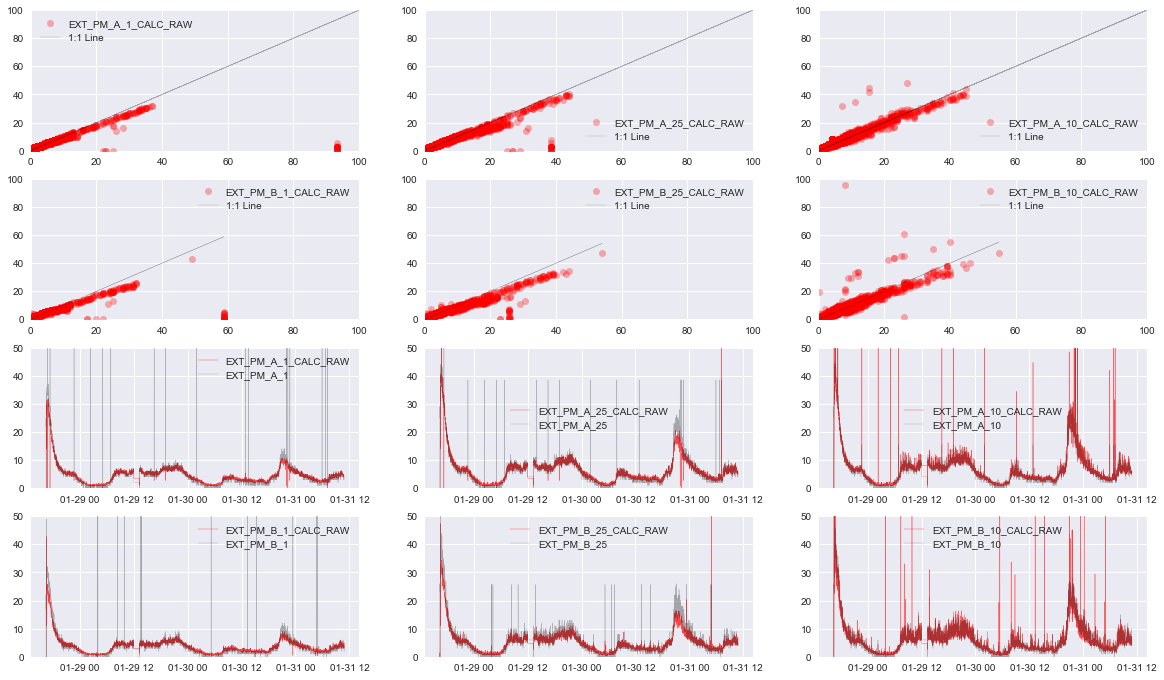

In [114]:

MASS_DI_CORR = np.pi/6.0 * np.power(BINS_DI, 3) * DENSITY * 1.0/1e6 #ug
MASS_DI_CORR [0,0] = model.params[0]*MASS_DI_CORR [0,0]
MASS_DI_CORR [0,1] = model.params[1]*MASS_DI_CORR [0,1]

print('---RAW VALUES---')
print('BINS_NAME', BINS_NAME)
print('BINS', BINS)
print('BINS_DI', BINS_DI)
print('MASS_DI_CORR', MASS_DI_CORR)

MIN_THD_COUNT = 5 # Discard PN bins below this thd

i = 0

gs = gridspec.GridSpec(5, 3)
fig = plot.figure(figsize=(20,15))

fig.tight_layout()

for sensor in SENSOR:
    
    data_modify[PRE + '_' + sensor + '_03_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_03'] - data_modify[PRE + '_' + sensor + '_05'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_05_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_05'] - data_modify[PRE + '_' + sensor + '_1'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_1_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_1'] - data_modify[PRE + '_' + sensor + '_25'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_25_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_25'] - data_modify[PRE + '_' + sensor + '_5'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_5_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_5'] - data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)
    data_modify[PRE + '_' + sensor + '_10_ABS'] = 0 # maxer_hist(data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)
    
    mask = data_modify.columns.str.contains(PRE + '_' + sensor + '_.*_ABS')
    
    pn_abs_values = data_modify.loc[:,mask].values
    pm_abs_values_raw = MASS_DI_CORR * pn_abs_values * 1e4
    pm_abs_values_cor = np.multiply(mass_di_cor, pn_abs_values) * 1e4 #element wise
    
    for PM_BIN in HARD_UPPER_LIMITS:
        if PM_BIN == 1.0:
            fraction_index = 0
            PM_BIN_NAME = '1'
        elif PM_BIN == 2.5:
            fraction_index = 1
            PM_BIN_NAME = '25'
        elif PM_BIN == 10.0:
            fraction_index = 2
            PM_BIN_NAME = '10'
                    
        pm_fraction_values_raw = np.zeros([pm_abs_values_raw.shape[0],1])

        for row in range(pm_fraction_values_raw.shape[0]):
            pm_fraction_values_raw[row] = np.dot(pm_abs_values_raw[row,:], fraction_raw[row,:, fraction_index])

        data_modify['EXT_PM' + '_' + sensor + '_' + PM_BIN_NAME + '_CALC_RAW'] = pm_fraction_values_raw
        
        ax = fig.add_subplot(gs[i])
        
        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
                  'ro', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW', alpha = 0.3)
        
        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  'k', label = '1:1 Line', linewidth = 0.4, alpha = 0.3)
        plot.legend(loc = 'best')
        plot.xlim([0, 100])
        plot.ylim([0, 100])
        ax = fig.add_subplot(gs[i+6])
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
                  'r', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW', linewidth = 0.4, alpha = 0.7)
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  'k', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME, linewidth = 0.4, alpha = 0.3)
        
        plot.legend(loc = 'best')
        
        plot.ylim([0, 50])
    
        i = i + 1